In [12]:
import pandas as pd
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


In [5]:
df: pd.DataFrame = pd.read_csv("../data/interm/globalterrordb.csv", index_col=0)

In [23]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
eventid,138513.0,NaN,NaN,NaN,200605852270.339874,1240710229.259968,197000000001.0,199612040006.0,201204060014.0,201509110042.0,201912310033.0
iyear,138513.0,NaN,NaN,NaN,2005.992427,12.407364,1970.0,1996.0,2012.0,2015.0,2019.0
imonth,138513.0,NaN,NaN,NaN,6.454145,3.389935,0.0,4.0,6.0,9.0,12.0
iday,138513.0,NaN,NaN,NaN,15.556367,8.797438,0.0,8.0,15.0,23.0,31.0
extended,138513.0,NaN,NaN,NaN,0.035585,0.185254,0.0,0.0,0.0,0.0,1.0
country,138513.0,NaN,NaN,NaN,126.186149,104.67929,4.0,78.0,95.0,160.0,1004.0
country_txt,138513,200,Iraq,22164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,138513.0,NaN,NaN,NaN,7.308801,2.787032,1.0,6.0,6.0,10.0,12.0
region_txt,138513,12,Middle East & North Africa,40222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
provstate,138513,2316,Baghdad,7363,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
df.hist(bins=50, figsize=(15, 25), layout=(-1, 5))

NameError: name 'df' is not defined

In [6]:
columns_to_drop = ["eventid", "iyear", "imonth", "iday", "country", "region_txt", "provstate", "city",
                   "summary", "crit1", "crit2", "crit3", "doubtterr", "attacktype1_txt", "targtype1_txt",
                   "targsubtype1_txt", "corp1", "target1", "natlty1_txt", "weaptype1_txt", "weapsubtype1_txt",
                   "weapdetail", "scite1", "dbsource", "ncasualties", "nkill", "nkillus", "nkillter", "nwound",
                   "nwoundus", "nwoundte", "nperpcap"]

In [7]:
df.drop(columns_to_drop, inplace=True, axis=1)

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
extended,138513.0,NaN,NaN,NaN,0.035585,0.185254,0.0,0.0,0.0,0.0,1.0
country_txt,138513,200,Iraq,22164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,138513.0,NaN,NaN,NaN,7.308801,2.787032,1.0,6.0,6.0,10.0,12.0
latitude,138513.0,NaN,NaN,NaN,23.966389,17.711146,-53.154613,12.103822,31.640278,34.516895,74.633553
longitude,138513.0,NaN,NaN,NaN,34.086474,54.606735,-157.858333,12.931001,44.371771,69.830807,179.366667
specificity,138512.0,NaN,NaN,NaN,1.373296,0.823942,1.0,1.0,1.0,1.0,4.0
vicinity,138513.0,NaN,NaN,NaN,0.06525,0.282553,-9.0,0.0,0.0,0.0,1.0
multiple,138513.0,NaN,NaN,NaN,0.15452,0.361448,0.0,0.0,0.0,0.0,1.0
success,138513.0,NaN,NaN,NaN,0.87124,0.334936,0.0,1.0,1.0,1.0,1.0
suicide,138513.0,NaN,NaN,NaN,0.039642,0.195119,0.0,0.0,0.0,0.0,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138513 entries, 0 to 201182
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   extended      138513 non-null  int64  
 1   country_txt   138513 non-null  object 
 2   region        138513 non-null  int64  
 3   latitude      138513 non-null  float64
 4   longitude     138513 non-null  float64
 5   specificity   138512 non-null  float64
 6   vicinity      138513 non-null  int64  
 7   multiple      138513 non-null  int64  
 8   success       138513 non-null  int64  
 9   suicide       138513 non-null  int64  
 10  attacktype1   138513 non-null  int64  
 11  targtype1     138513 non-null  int64  
 12  targsubtype1  129320 non-null  float64
 13  natlty1       136988 non-null  float64
 14  gname         138513 non-null  object 
 15  guncertain1   138269 non-null  float64
 16  individual    138513 non-null  int64  
 17  nperps        98171 non-null   float64
 18  clai

In [29]:
df.to_csv("../data/proccessed/globalterrordb_proccesed_1.csv")

In [20]:
df.cas_class.value_counts() / 138513

1    0.586645
0    0.413355
Name: cas_class, dtype: float64

In [9]:
y = df["cas_class"]
X = df.drop("cas_class", axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

array([[<AxesSubplot:title={'center':'extended'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'specificity'}>],
       [<AxesSubplot:title={'center':'vicinity'}>,
        <AxesSubplot:title={'center':'multiple'}>,
        <AxesSubplot:title={'center':'success'}>,
        <AxesSubplot:title={'center':'suicide'}>,
        <AxesSubplot:title={'center':'attacktype1'}>],
       [<AxesSubplot:title={'center':'targtype1'}>,
        <AxesSubplot:title={'center':'targsubtype1'}>,
        <AxesSubplot:title={'center':'natlty1'}>,
        <AxesSubplot:title={'center':'guncertain1'}>,
        <AxesSubplot:title={'center':'individual'}>],
       [<AxesSubplot:title={'center':'nperps'}>,
        <AxesSubplot:title={'center':'claimed'}>,
        <AxesSubplot:title={'center':'weaptype1'}>,
        <AxesSubplot:title={'center':'weapsubtype1'}>,
        <AxesS

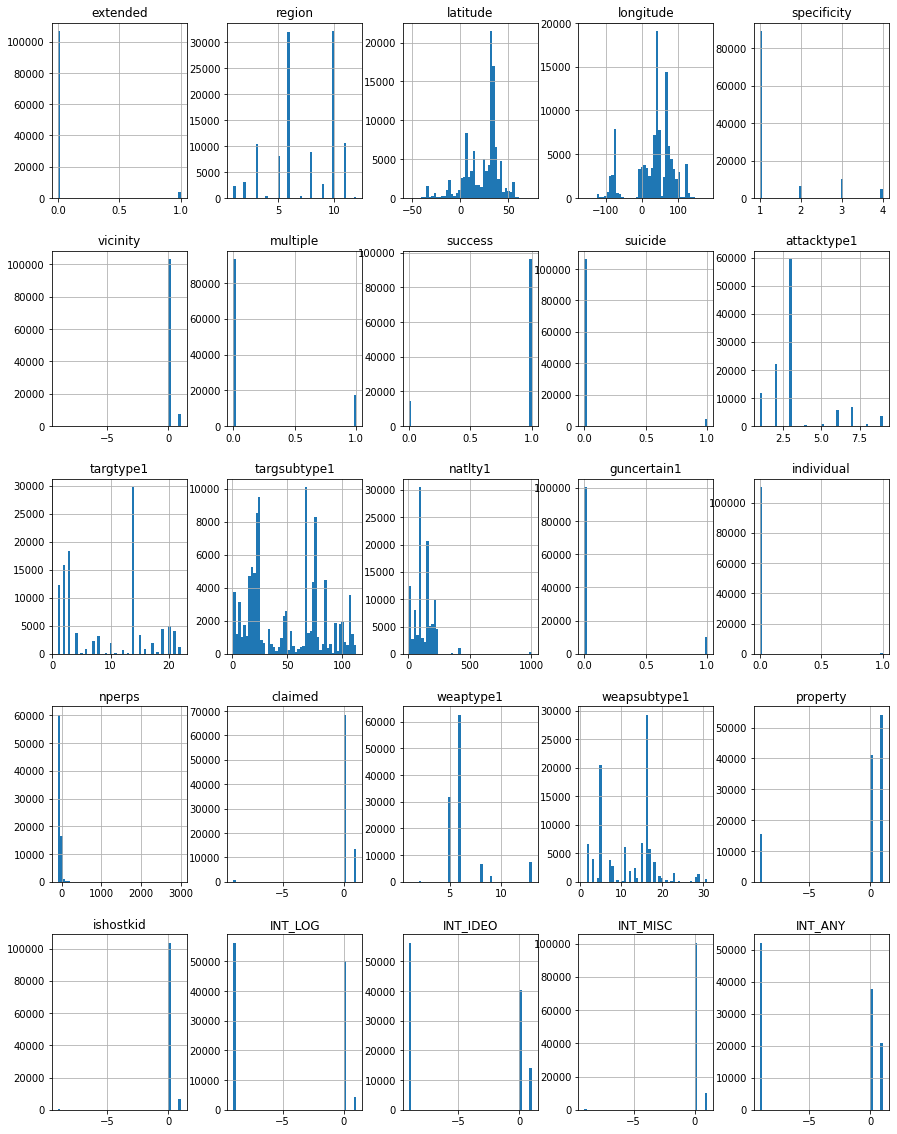

In [87]:
X_train.hist(figsize=(15, 20), bins=50)

In [22]:
encoder = ce.CountEncoder(cols=["country_txt", "gname"])
imputer = SimpleImputer(strategy="constant", fill_value=-9)
scaler = QuantileTransformer(output_distribution="normal")

In [23]:
pipeline = make_pipeline(encoder, imputer, scaler)

In [24]:
pipeline

Pipeline(steps=[('countencoder',
                 CountEncoder(cols=['country_txt', 'gname'],
                              combine_min_nan_groups=True)),
                ('simpleimputer',
                 SimpleImputer(fill_value=-9, strategy='constant')),
                ('quantiletransformer',
                 QuantileTransformer(output_distribution='normal'))])

In [149]:
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [150]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=pipeline[1].get_feature_names_out(),
                                   index=X_train.index)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=pipeline[1].get_feature_names_out(),
                                  index=X_test.index)

array([[<AxesSubplot:title={'center':'x0'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>],
       [<AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>],
       [<AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>],
       [<AxesSubplot:title={'center':'x15'}>,
        <AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>],
       [<AxesSubplot:title={'center':'x20'}>,
        <AxesSubplot:title={'center':'x2

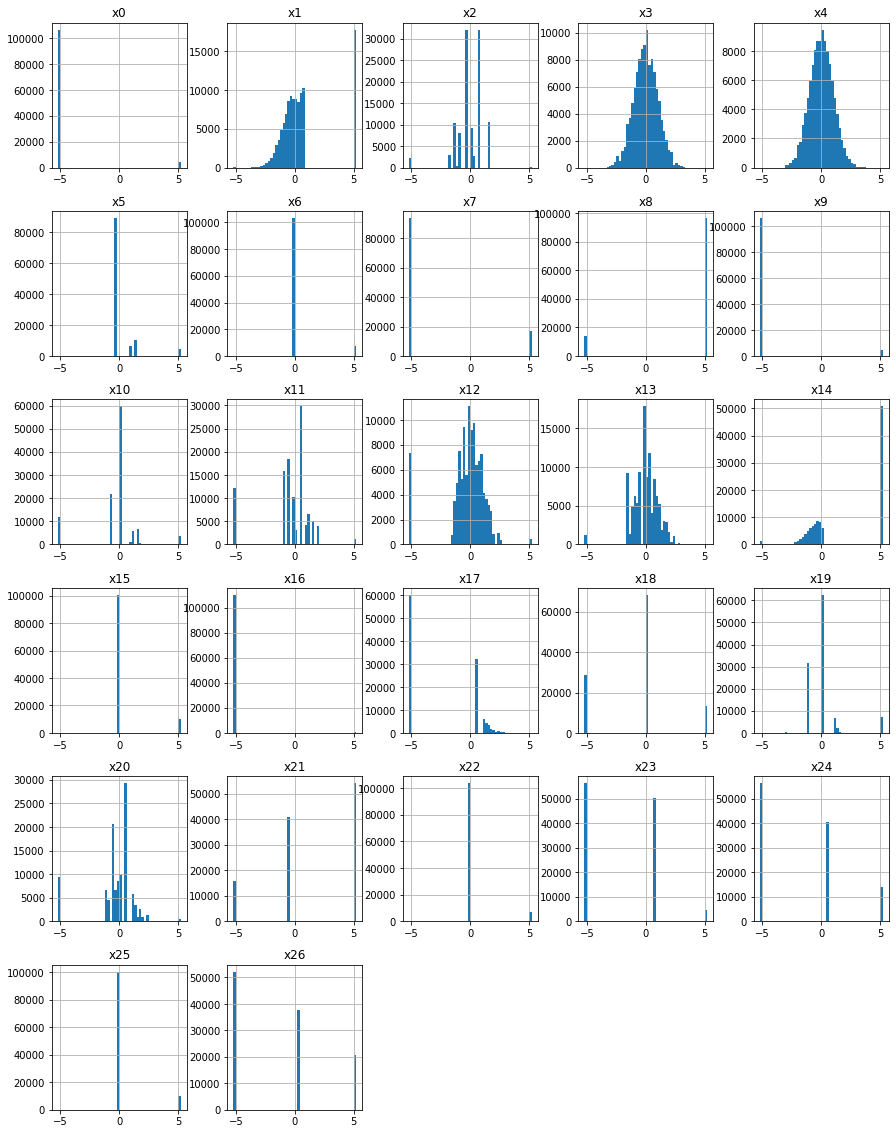

In [145]:
X_train_transformed.hist(figsize=(15, 20), bins=50)

In [151]:
train = X_train_transformed.join(y_train)
test = X_test_transformed.join(y_test)

In [153]:
train.to_csv("../data/modeling/train.csv", index=False)
test.to_csv("../data/modeling/test.csv", index=False)